In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.decomposition import PCA
from sklearn.ensemble import BaggingClassifier,VotingClassifier,RandomForestClassifier,ExtraTreesClassifier

In [2]:

mes1_phonesens = pd.read_csv('/content/drive/MyDrive/ml project/Ipin2016Dataset/measure1_smartphone_sens.csv')
mes1_watchsens = pd.read_csv('/content/drive/MyDrive/ml project/Ipin2016Dataset/measure1_smartwatch_sens.csv')
mes2_watchsens = pd.read_csv('/content/drive/MyDrive/ml project/Ipin2016Dataset/measure2_watch_sens.csv')
mes2_phonesens = pd.read_csv('/content/drive/MyDrive/ml project/Ipin2016Dataset/measure2_phone_sens.csv')


In [3]:
l= np.ones(len(mes1_phonesens),dtype = int)
mes1_phonesens['target'] = pd.DataFrame(l)
l2 = np.ones(len(mes2_phonesens),dtype = int)
mes2_phonesens['target'] = pd.DataFrame(l2)
l3 = np.zeros(len(mes1_watchsens),dtype = int)
mes1_watchsens['target'] = pd.DataFrame(l3)
l4 = np.zeros(len(mes2_watchsens),dtype = int)
mes2_watchsens['target'] = pd.DataFrame(l4)

main = mes1_phonesens.append([mes2_phonesens,mes2_phonesens,mes1_watchsens,mes1_watchsens])
main = main.sample(frac=1).reset_index()
main


,index,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ,target
0,985,1422629802492,-1.097,5.800,8.302,-12.500,0.800,-39.100,36.339,-34.713,-6.176,0.000,0.000,0.000,1
1,49177,1423044271426,6.206,-6.913,3.061,-37.999,16.603,-0.233,67.819,67.091,39.732,-0.070,0.010,0.020,0
2,15948,1422631243455,-0.449,-7.602,-6.594,-17.760,-3.180,50.304,337.533,128.455,4.850,-0.145,-0.724,-0.521,0
3,9404,1422884607472,1.067,2.602,9.288,24.700,13.700,-35.600,310.292,-19.940,7.727,0.000,0.000,0.000,1
4,3322,1423054968221,-0.225,5.867,7.881,-17.400,1.000,-40.400,36.418,-36.657,-1.314,0.000,0.000,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170669,50605,1423044422489,7.286,-7.511,2.456,-7.637,32.901,-18.411,254.218,70.068,38.584,0.218,-0.173,-0.017,0
170670,37620,1422884840435,0.120,-10.457,0.605,-17.815,35.771,-0.490,82.040,84.543,-1.983,0.016,-0.343,-0.097,0
170671,13457,1422884094770,0.522,3.071,8.666,-13.800,-32.100,-28.300,150.359,-19.489,3.313,0.000,0.000,0.000,1
170672,1038,1422629807793,-1.001,5.733,8.130,-13.900,0.900,-38.400,38.513,-34.050,-5.455,0.000,0.000,0.000,1


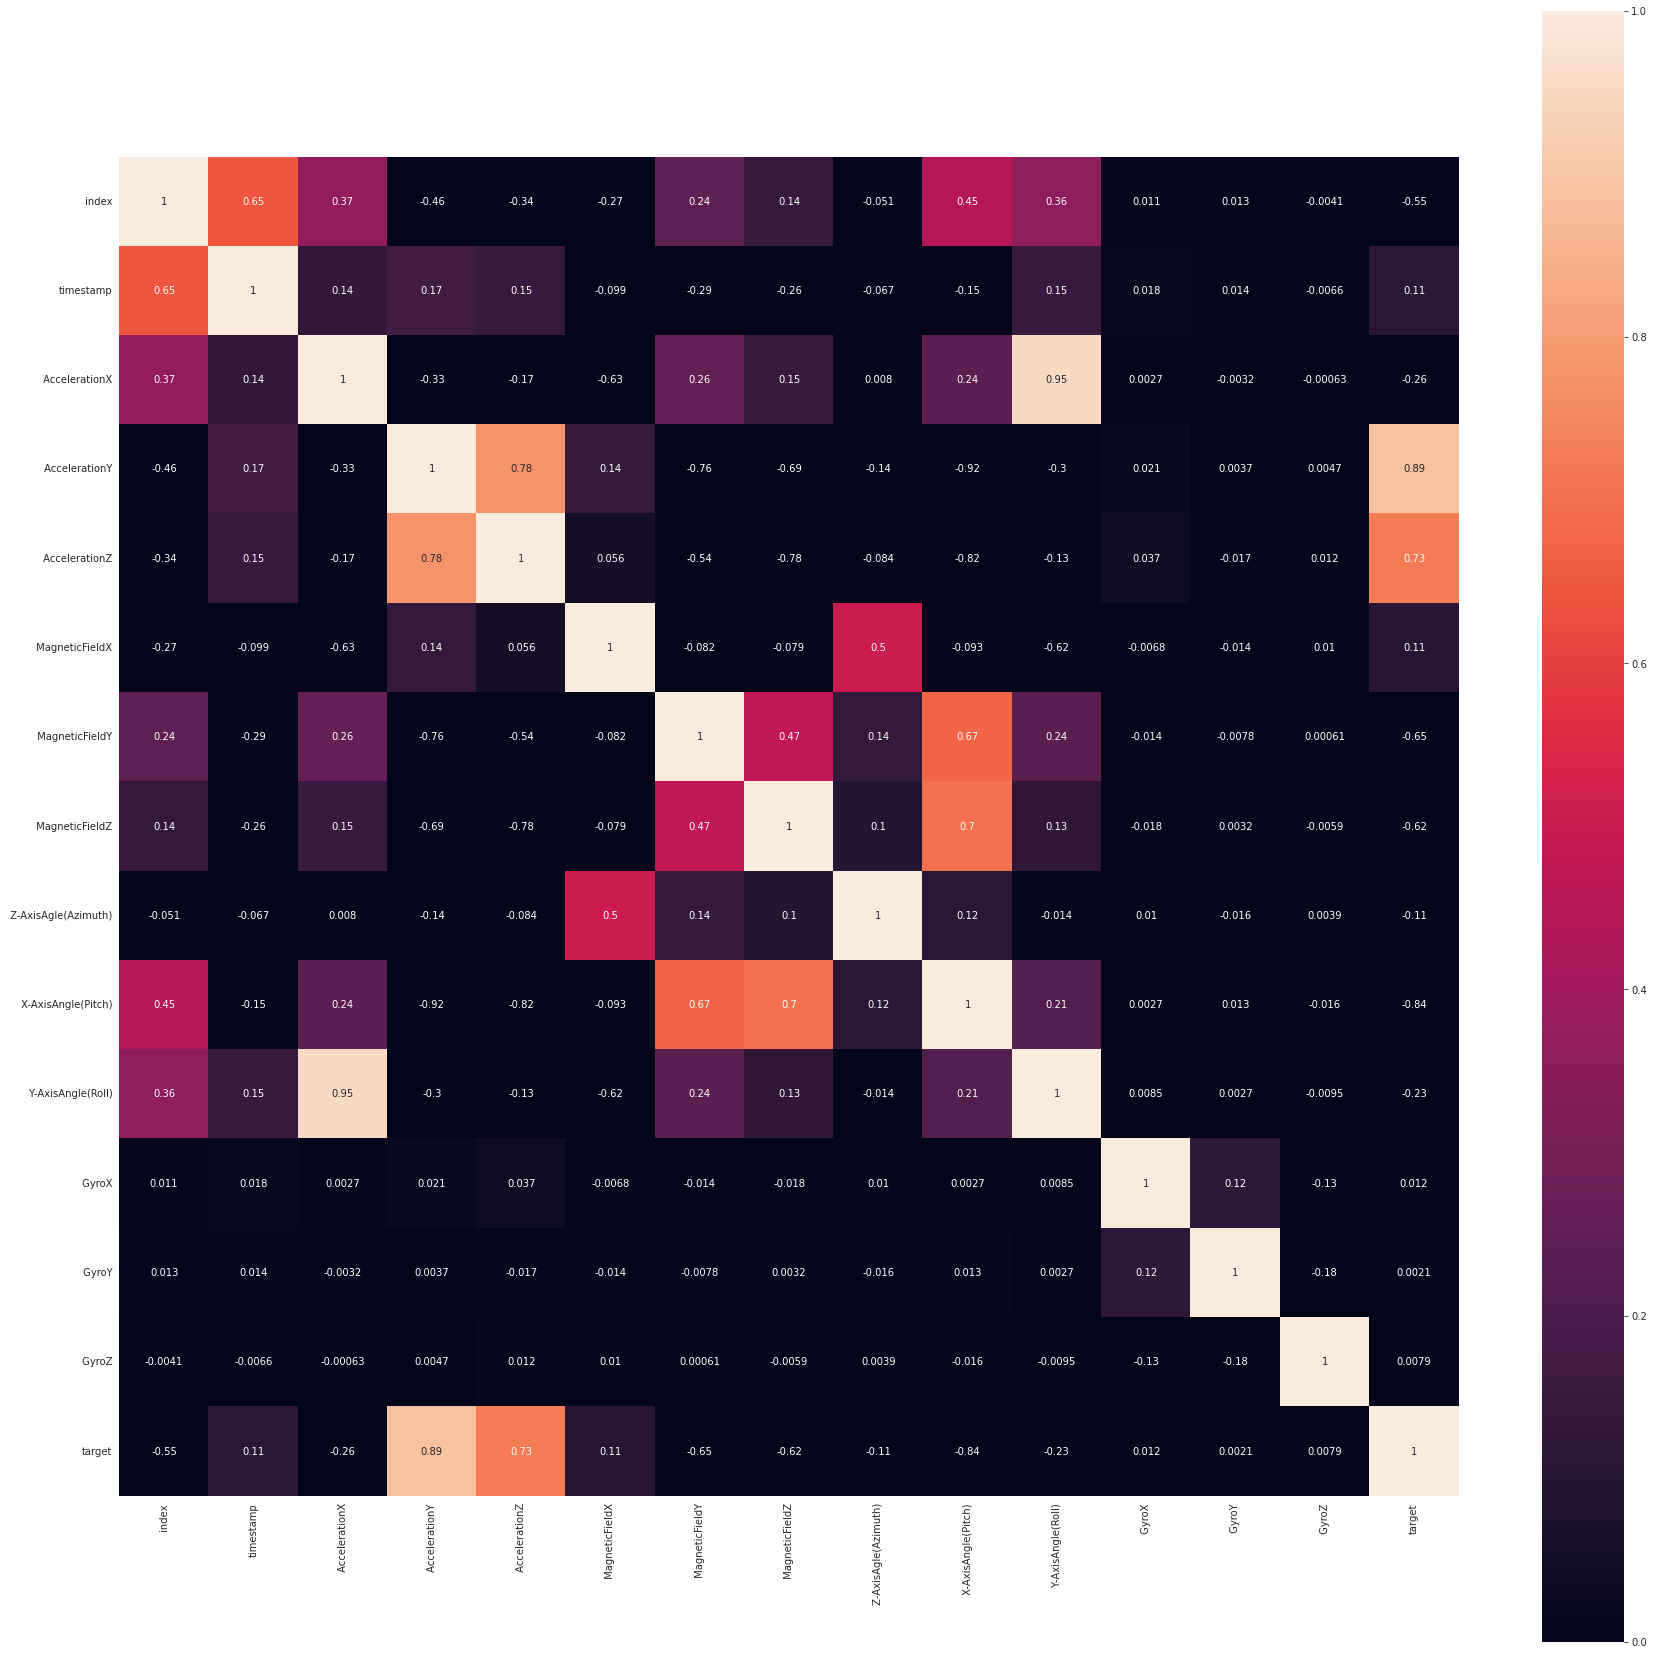

In [ ]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,30))
    sns.heatmap(data=main.corr(),vmin=0,vmax=1,square=True,annot=True)

## **PCA**

In [12]:
pca=PCA(n_components=9)
df_pca=pca.fit_transform(main)
x= df_pca
y = main['target'].values
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)



# **Naive bayes**

In [24]:
nb=GaussianNB()
nb.fit(train_x,train_y)
pred_y_nb=nb.predict(test_x)
print(classification_report(test_y,pred_y_nb))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     23457
           1       0.94      0.77      0.85     10678

    accuracy                           0.91     34135
   macro avg       0.92      0.87      0.89     34135
weighted avg       0.91      0.91      0.91     34135



In [29]:
from sklearn.metrics import f1_score
nba = accuracy_score(test_y,pred_y_nb)
nba
nbf1= f1_score(test_y,pred_y_nb)
nbf1


0.8455017212146123

In [26]:
print(confusion_matrix(test_y,pred_y_nb))

[[22900   557]
 [ 2450  8228]]


## **Logistic regresion**

In [31]:
lr=LogisticRegression(max_iter=3000)
lr.fit(train_x,train_y)
lr_pred_y=lr.predict(test_x)
print(classification_report(test_y,lr_pred_y))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92     23457
           1       0.82      0.86      0.84     10678

    accuracy                           0.90     34135
   macro avg       0.88      0.89      0.88     34135
weighted avg       0.90      0.90      0.90     34135



In [33]:
lra = accuracy_score(test_y,lr_pred_y)
lrf1= f1_score(test_y,lr_pred_y)
lrf1

0.8397268435766992

In [7]:
print(confusion_matrix(test_y,lr_pred_y))

[[21250  1988]
 [ 1548  9349]]


# **KNN**

In [13]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(train_x,train_y)
pred_y_knn=knn.predict(test_x)
print(classification_report(test_y,pred_y_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23457
           1       1.00      1.00      1.00     10678

    accuracy                           1.00     34135
   macro avg       1.00      1.00      1.00     34135
weighted avg       1.00      1.00      1.00     34135



In [37]:
knna = accuracy_score(test_y,pred_y_knn)
knnf1= f1_score(test_y,pred_y_knn)
knnf1

1.0

In [15]:
print(confusion_matrix(test_y,pred_y_knn))

[[23457     0]
 [    0 10678]]


# **Random Forest**

In [35]:
rad=RandomForestClassifier(bootstrap=True)
rad.fit(train_x,train_y)
pred_y_rad=rad.predict(test_x)
print(classification_report(test_y,pred_y_rad))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23457
           1       1.00      1.00      1.00     10678

    accuracy                           1.00     34135
   macro avg       1.00      1.00      1.00     34135
weighted avg       1.00      1.00      1.00     34135



In [36]:
rfa = accuracy_score(test_y,pred_y_rad)
rff1= f1_score(test_y,pred_y_rad)
rff1

1.0

# **report for compairing different algorithms**

In [20]:
comparison_report = pd.DataFrame(columns = ["type", "knn", "random forest" , "logistic regression" , "decision tree"],
                                 ["f1score",knnf1,rff1,lrf1,])




,type,knn,random forest,logistic regression,decision tree
